# Gym.Mountain-Car

Алгоритм улучшенного Q-learning (переработанный пример из Kaggle)

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
# !pip install pyglet

In [3]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0') #, mode="human")
env.reset()


array([-0.5993997,  0.       ], dtype=float32)

In [4]:
print(env.observation_space.high , env.observation_space.low)
print(env.observation_space.high - env.observation_space.low)

# print(type(env.observation_space.high))
print((env.observation_space.high - env.observation_space.low) * np.array([10, 100]))
num_states =np.round((env.observation_space.high - env.observation_space.low) * np.array([10, 100]), 0).astype(int) + 1

print(num_states)
# print(num_states[0]*num_states[1]*3)

# Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
# print(Q.shape)

state = env.reset()
print(type(state), state, type(env.observation_space.low),env.observation_space.low)

state_adj = (state - env.observation_space.low)*np.array([10, 100])

state_adj = np.round(state_adj, 0).astype(int)
print(f'{state_adj=}')

[0.6  0.07] [-1.2  -0.07]
[1.8000001 0.14     ]
[18.00000072 14.00000006]
[19 15]
<class 'numpy.ndarray'> [-0.4964677  0.       ] <class 'numpy.ndarray'> [-1.2  -0.07]
state_adj=array([7, 7])


In [5]:
# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while not done :       #!= True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

            
    return ave_reward_list


Text(0.5, 1.0, 'Average Reward vs Episodes')

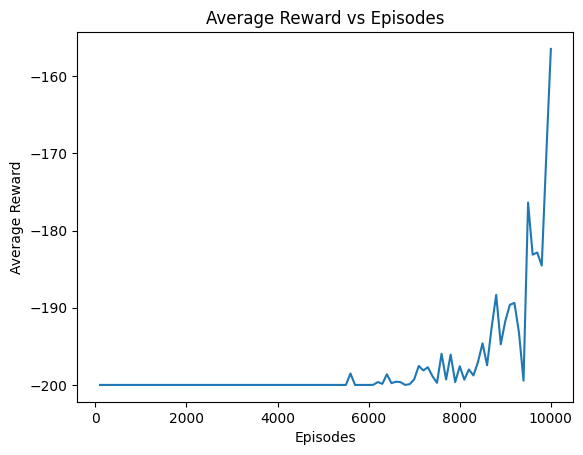

In [6]:
# Run Q-learning algorithm for 1000 episodes
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 10000)

plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

Text(0.5, 1.0, 'Average Reward vs Episodes')

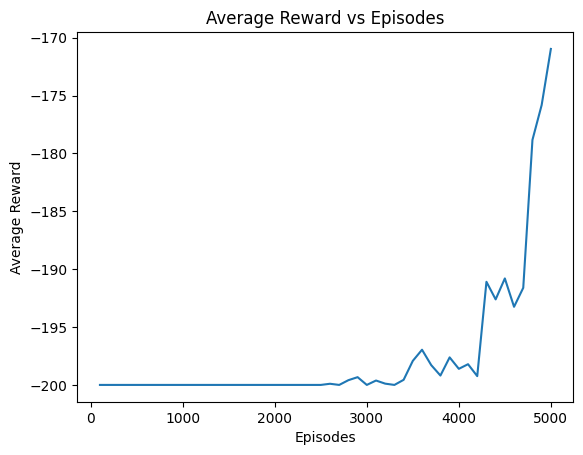

In [7]:
# Run Q-learning algorithm for 5000 episodes
# QLearning(env, learning, discount, epsilon, min_eps, episodes)
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)

plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')